In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x = mnist.validation.images

In [4]:
x_4d = x.reshape([-1,28,28,1])

In [5]:
x_4d[:,:14,:14,:].shape

(5000, 14, 14, 1)

In [6]:
conbi = [(0,0), (0,1), (1,0), (1,1)]
for i, (w,h) in enumerate(conbi):
    print(i)
    print(w)
    print(h)

0
0
0
1
0
1
2
1
0
3
1
1


In [7]:
np.ones([3,14,14,1])

array([[[[ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.]],

        [[ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],
         [ 1.],


In [8]:
import tensorflow as tf
import numpy as np

x_4d = tf.placeholder(shape=[None,28,28,1], dtype=tf.int32)

x = tf.slice(x_4d, [0,14,14,0], [-1,15,15,1])

input_ = np.ones([3,14,14,1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(x, feed_dict={x: input_}))

ValueError: Cannot feed value of shape (3, 14, 14, 1) for Tensor 'Slice:0', which has shape '(?, 15, 15, 1)'

# mnist as real images

There are three
* mnist.test
* mnist.train
* mnist.validation

## mnist.test

In [9]:
mnist.test.images.shape

(10000, 784)

## mnist.validation

In [10]:
mnist.validation.images.shape

(5000, 784)

## mnist.train

In [11]:
mnist.train.images.shape

(55000, 784)

In [12]:
mnist.train.labels.shape

(55000, 10)

In [40]:
x, _x = mnist.train.next_batch(4)

In [41]:
print(x.shape, _x.shape)

(4, 784) (4, 10)


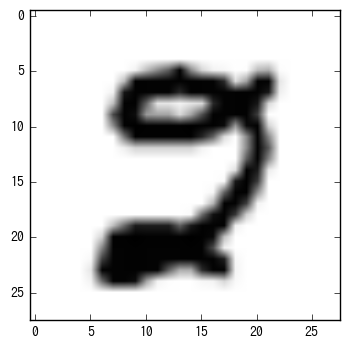

In [42]:
plt.imshow(((x[1] - 1/2)*2).reshape(28,28), cmap='Greys')

0.0 1.0


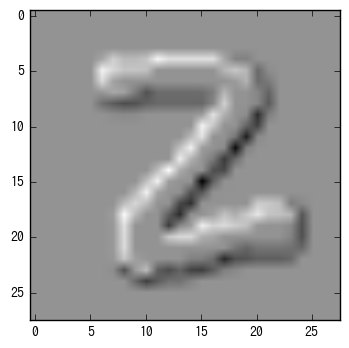

In [66]:
x, _x = mnist.train.next_batch(4)
# x[:,28*12:28*16] = 0
y = x.reshape(4,28,28)
y[:,1:28,1:28] = (y[:,1:28,1:28] - y[:,:27,1:28]) + (y[:,1:28,1:28] - y[:,1:28,:27])
y = (y - np.min(y)) / (np.max(y) - np.min(y))
print(np.min(y),np.max(y))
plt.imshow(y[0], cmap='Greys_r')

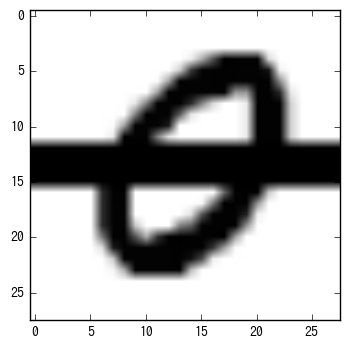

In [45]:
x[:2, :].shape

(2, 784)

In [46]:
np.random.rand(4,4).astype('float32')

array([[ 0.42023844,  0.32321882,  0.9490357 ,  0.22281103],
       [ 0.75994194,  0.04761986,  0.4020218 ,  0.06283523],
       [ 0.75821078,  0.99111342,  0.80220771,  0.36521816],
       [ 0.7461189 ,  0.2213017 ,  0.55668032,  0.51814139]], dtype=float32)

In [47]:
x.shape

(4, 784)

In [48]:
x[2:6]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [49]:
arr = np.arange(9).reshape([3,3])
arr


array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [50]:
np.random.shuffle(arr, )
arr

array([[6, 7, 8],
       [0, 1, 2],
       [3, 4, 5]])

# Fonts as fake images

In [75]:
dim = 28 * 28
thick = 20
pad = (dim - 20) // 2

In [78]:
left = np.zeros(pad)

In [79]:
center = np.ones(thick)

In [82]:
x = np.concatenate((left,center,left), axis=0)

In [83]:
x

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

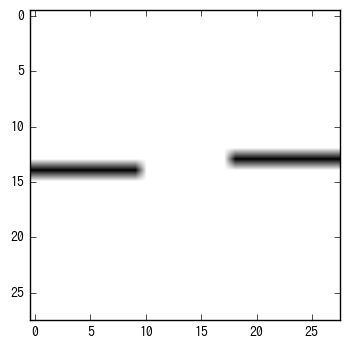

In [84]:
plt.imshow(((x - 1/2)*2).reshape(28,28), cmap='Greys')

In [86]:
from skimage.io import imread, imsave
import glob

images = []

In [90]:
for image_path in glob.glob("font_images/824F/*.png"):
    print(image_path)
    image = imread(image_path)
    print(image)
    images.append(image)

font_images/824F/07YasashisaAntique.otf.png
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ..., 
 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]
font_images/824F/851tegakizatsu_0875_bold.ttf.png
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ..., 
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0 

In [98]:
sample = images[0][:,:,0]

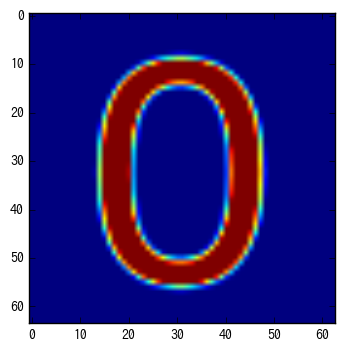

In [99]:
plt.imshow(sample)

In [100]:
sample.shape

(64, 63)

In [ ]:
sample

In [101]:
from PIL import Image
import glob

In [102]:
for image_path in glob.glob("font_images/824F/*.png"):
    image = Image.open(image_path)

In [104]:
image.shape

AttributeError: 'PngImageFile' object has no attribute 'shape'

In [ ]:
image = image.convert('L')
image = image[:,:,0]  # shape [height<64, width<64]
height, width = image.shape
image = (image / image.max() - 1/2) * 2  # rescale to [-1, 1]

fake_images.append(image)


In [128]:
from skimage.io import imread
import glob
from PIL import Image


fake_images = []
index = 0
for image_path in glob.glob("font_images/824F/*.png"):
    img = Image.open(image_path)
    img = img.convert('L')
    img = img.thumbnail((28, 28))
    path = "font_images/zero/" + str(index) + ".png"
    img.save(path)

    image = imread(path)
    image = image[:,:,0]  # shape [height<64, width<64]
    image = (image / image.max() - 1/2) * 2  # rescale to [-1, 1]

    fake_images.append(image)
    index = index + 1

AttributeError: 'NoneType' object has no attribute 'save'

In [125]:
img = Image.open(path)
img = img.convert('L')
img = img.thumbnail((28, 28))
print(img)
path = "font_images/zero/" + str(index) + ".png"
img.save(path)

None


AttributeError: 'NoneType' object has no attribute 'save'

In [132]:
path = "font_images/824F/07YasashisaAntique.otf.png"
img = Image.open(path)
img = img.resize((28,28))
img = img.convert('L')
img.save("test.png")

In [117]:
imread(img)

AttributeError: 'PngImageFile' object has no attribute 'read'

In [114]:
img

In [109]:
for image_path in glob.glob("font_images/824F/*.png"):
        img = Image.open(image_path)
        print(image_path)

font_images/824F/07YasashisaAntique.otf.png
font_images/824F/851tegakizatsu_0875_bold.ttf.png
font_images/824F/aoyagireisyosimo_otf_2_01.otf.png
font_images/824F/AozoraMincho-bold.ttf.png
font_images/824F/AozoraMinchoMedium.ttf.png
font_images/824F/AozoraMinchoRegular.ttf.png
font_images/824F/ArmedBanana.ttf.png
font_images/824F/ArmedLemon.TTF.png
font_images/824F/AsobiMemogaki-Regular-1-01.ttf.png
font_images/824F/azukiP.ttf.png
font_images/824F/Boku2-Bold.otf.png
font_images/824F/Boku2-Regular.otf.png
font_images/824F/CP_Font.otf.png
font_images/824F/dining_m.ttf.png
font_images/824F/f_feltpen04.otf.png
font_images/824F/font_1_ant-kaku.ttf.png
font_images/824F/font_1_ant-maru.ttf.png
font_images/824F/font_1_honokamarugo_1.1.ttf.png
font_images/824F/font_1_honokamin.ttf.png
font_images/824F/font_1_kokugl_1.15_rls.ttf.png
font_images/824F/font_1_kokumr_1.00_rls.ttf.png
font_images/824F/ftmaru400b.otf.png
font_images/824F/GenEiLateGo.otf.png
font_images/824F/GenEiLateMin.otf.png
font_im

In [28]:
import pandas as pd

labels = pd.DataFrame(mnist.test.labels)
images = pd.DataFrame(mnist.test.images)
x = images[labels[8]==1.0].as_matrix()

In [29]:
x.shape

(974, 784)

In [30]:
df = pd.DataFrame(labels)

In [31]:
df_images = pd.DataFrame(images)

In [32]:
x = df_images[df[8]==1.0].as_matrix()

In [33]:
x[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [34]:
test = mnist.test

In [35]:
labels = test.labels

In [36]:
images = test.images

In [37]:
labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [38]:
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
x_4d = x.reshape([-1,28,28])

ValueError: cannot reshape array of size 763616 into shape (14,14,28)

In [45]:
14*14*28

5488

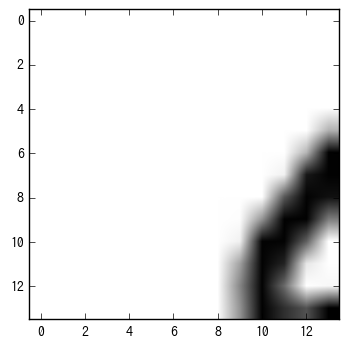

In [48]:
plt.imshow(x_4d[329][:14,:14], cmap='Greys')